# Guided Project: Analysis of Fandango's movie rating system

[Fandango](https://www.fandango.com/) is a online movie ratings aggregator, where a user can get informations on the movie ratings. 
Hickey analysed movie rating data in 2015 and found evidance that the Fandango's rating system was biased and dishonest on the movie rating. The article can be found [here](https://fivethirtyeight.com/features/fandango-movies-ratings/). In his analysis it was found that some of the ratings were rounded up to the nearest half-star. Example if the user rated 4.1 it would be rounded up to 4.5 stars and not 4 stars.

In this guided project will be using recent data to analyse whether there is any change in the Fandango rating system  after Hickey's analysis.

we have gathered sample data recently from Fandango's rating system to compare with Hickey analysed data from 2015.

###  Understanding the data

In [1]:
#import the libraries
import pandas as pd

We will be wroking with 2 samples of data. One sample collected previous to Hickey's analysis and the other sample was collected after.

In [2]:
#data set previous to Hickey's analysis
comparison = pd.read_csv("fandango_score_comparison.csv")
comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [3]:
print(comparison.shape)
comparison.head(3)

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [4]:
#read in the dataset that is after Hickey's analysis
data_set = pd.read_csv("movie_ratings_16_17.csv")

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [6]:
print(data_set.shape)
data_set.head(3)

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


From the 2 sample data sets only the required columns were selected for analysis. Hickey's analysis data was named as 'prev_data' and recent data set after Hickey's analysis was named as 'data'

In [7]:
prev_data = comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [8]:
data = data_set[['movie', 'year', 'fandango']]

In [9]:
prev_data.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [10]:
data.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Our goal for this project is to compare the Fandango rating system data from previous to Hickey's analysis to a data set collected after Hickey's analysis. we have gathered sample data recently from Fandango's rating system but we want to make sure the sample data sets are respresentative of the population of the data otherwise our analysis will have a large sampling error leading to wrong conclusions.

For the dataset collected before Hickey's article from [Github data set repository](https://github.com/fivethirtyeight/data/tree/master/fandango) data set from the README.md, it is noted the following criteria for the data.
    * At least 30 fan reviews on Fandango.
    * The data from Fandango pulled on Aug 24th, 2015.

For the dataset collected after Hickey's analysis from [Github data set repository](https://github.com/mircealex/Movie_ratings_2016_17) from README.md the following criteria is stated:
    * most popular movies(with a significant number of votes).
    * movies released on 2016 or later.
    
From the above criteria for the data sets it is clear that the sampling process is not random and the resulting samples are unlikely to be representative of the population for our analysis.

Therefore plan to change the goal for our analysis.

### Change of Goal for our analysis

We can either collect new data for our analysis or change our goal of plan. We will change the goal of our plan having some limitations to the initail goal.

Our new goal is to check whether there is any difference between Fandango rating for popular movies in 2015 and in 2016.
The movies are considered as popular since the sampling data is fan rating counts more than 30.

In [11]:
# to check the whether there is any Fandango_votes that is less than 30 counts.
data_fandago_votes = sum(prev_data['Fandango_votes'] <30)
print(data_fandago_votes)

0


In [12]:
# Using sample from the 'data' data set
data.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [13]:
#using a sample from 'prev_data'
prev_data.sample(10, random_state =1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


Expolring the random sampling data was one way to check whether data is correct for our analysis.

In [14]:
#value counts from the recent data in 'Year' column
data["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
#get the data from year 2016 and assign to dt_2016
dt_2016 = data[data['year']== 2016]

In [16]:
fandango_prev = prev_data.copy()
#from fandango_prev copy the year to a column name 'Year'
fandango_prev["Year"] = fandango_prev["FILM"].str[-5:-1]

In [17]:
#value counts from the previous data in 'Year' column
fandango_prev['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [18]:
#get the data for year 2015 and assign to fandango_2015
fandango_2015 = fandango_prev[fandango_prev['Year'] == '2015']
fandango_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


### Comparing the data from 2016 and 2015

We have got two data sets that is fandango_2015 (year 2015 data from previous to Hickey's analysis) and dt_2016 (year 2016 data from after the Hickey's analysis). We will compare the two datasets to see any difference for the popular movie ratings in the Fandango rating system.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import arange

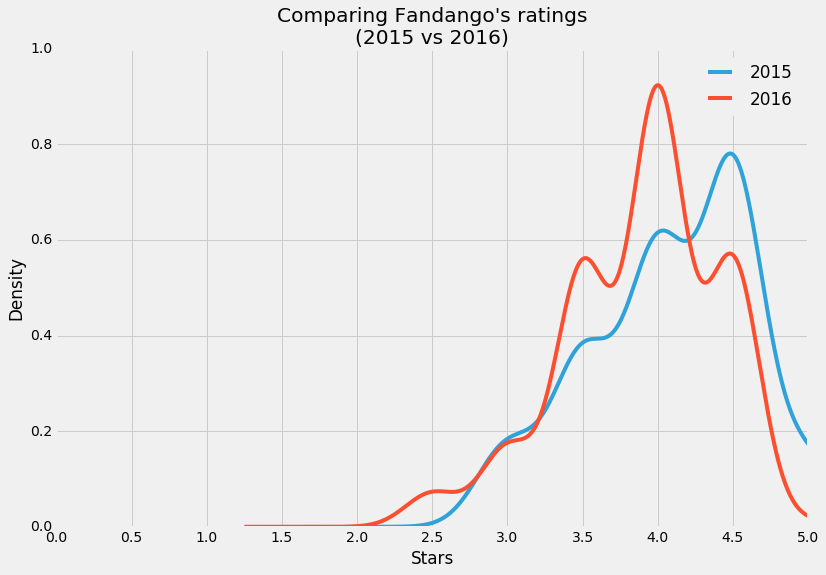

In [20]:
plt.style.use('fivethirtyeight')
fandango_2015["Fandango_Stars"].plot.kde(label= '2015', legend = True, figsize=(12,8))
dt_2016["fandango"].plot.kde(label= '2016', legend = True)
plt.legend()
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.title("Comparing Fandango's ratings\n(2015 vs 2016)")
plt.show()

In [21]:
print(sum(data["fandango"]>5))

0


* From the graph it shows that both the data sets distribution graphs are slightly left skewed.
* In 2016 data between the ratings 3.5 to 4.5 there is high percentage of counts.
* Movies in 2016 were rated slightly lower than movies in 2015.

In [22]:
dt_2016["fandango"].value_counts()

4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64

In [23]:
fandango_2015["Fandango_Stars"].value_counts()

4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

Since the data sets has different number of data, we will calculate the percentage as below

In [24]:
dt_2016["fandango"].value_counts(normalize = True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [25]:
fandango_2015["Fandango_Stars"].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

* From the 2 frequency destribution data minimum rating is 2.5 in 2016 and 3 in 2015.
* In 2016 the rating 5 percentage is lower, less than 1% compared to 2015. * Compared to 2015 both ratings 5 and 4.5 is lower in 2016.
* In 2016 there is higher frequncey percentage in rating 3.5 and 4 as seen in the graph ealier.

### Analyze the Summary Statistics

To analyze more granular information mean, mode and median was calculated as below.

In [26]:
print("data_2016 mean value:",dt_2016["fandango"].mean())
print("data_2016 median value:",dt_2016["fandango"].median())
print("data_2016 mode value:",dt_2016["fandango"].mode())

data_2016 mean value: 3.887434554973822
data_2016 median value: 4.0
data_2016 mode value: 0    4.0
dtype: float64


In [27]:
print("data_2015 mean value:",fandango_2015["Fandango_Stars"].mean())
print("data_2015 median value:",fandango_2015["Fandango_Stars"].median())
print("data_2015 mode value:",fandango_2015["Fandango_Stars"].mode())

data_2015 mean value: 4.0852713178294575
data_2015 median value: 4.0
data_2015 mode value: 0    4.5
dtype: float64


From the mean, median, mode values it is clear that there is a slight difference between the 2 data sets. 2015 data mode value is 4.5 and 2016 mode value is 4.0. Therefore can conclude that 2015 the rating is slightly higher than 2016.

In [28]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = dt_2016["fandango"].mean()

mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = dt_2016["fandango"].mode()[0]

median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = dt_2016["fandango"].median()

In [29]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, mode_2015, median_2015]
summary['2016'] = [mean_2016, mode_2016, median_2016]
summary.index = ['Mean', 'Mode','Median']
summary

,2015,2016
Mean,4.085271,3.887435
Mode,4.500000,4.000000
Median,4.000000,4.000000


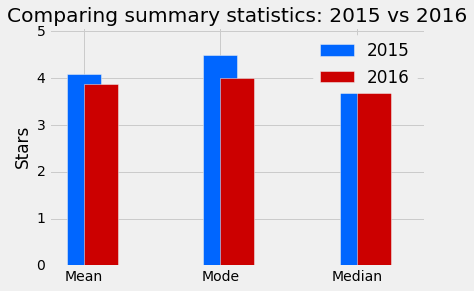

In [30]:
summary['2015'].plot.bar(label = '2015', color = '#0066FF', align='center', width=0.25)
summary['2016'].plot.bar(label = '2016', color = '#CC0000',align='edge',width=0.25, rot = 0)
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.1,0.5)
plt.ylabel('Stars')
plt.legend()
plt.show()

* From the graph the median for the both the year are same
* The mode is lower 0.5 from 2015 to 2016 data.
* There is also a slightly lower change in data in 2016 compared to 2015.

### Conclusion

From the analysis it is clear that there is a slight difference between Fandango's rating for popular movies in 2015 and Fandango's ratings for popular movies in 2016.
On average popular movies released in 2016 were rated slightly lower than popular movies leased in 2015. 
We cannot sum up what caused the change but can assume that the Fandango's rating system has corrected the issues that Hickey's analysis highlighted.
